<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('\nThe column names are:\n')
    print(df.columns.tolist())

    # Display data types
    print('\nThe data types are:\n')
    print(df.dtypes)
    
    # Examine shape
    print('\nThe shape is:\n')
    print(df.shape)

    # Examine summary information
    print('\nThe summary statistics are:\n')
    print(df.describe())


The column names are:

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeSt

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Missing values per column:\n")
    print(df.isnull().sum())

majority_remote = df['RemoteWork'].mode()[0]
df.fillna({'RemoteWork':majority_remote}, inplace = True)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

mean_code = df['YearsCodePro'].mean()
df.fillna({'YearsCodePro':mean_code}, inplace = True)

mean_sat = df['JobSat'].mean()
df.fillna({'JobSat':mean_sat}, inplace = True)

df.fillna({'LanguageHaveWorkedWith':''}, inplace=True)
df.fillna({'LanguageWantToWorkWith':''}, inplace=True)

Missing values per column:

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmi

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
print("\nValue counts for Employment\n")
print(df['Employment'].value_counts())

print("\nValue counts for JobSat:\n")
print(df['JobSat'].value_counts())

print("\nValue counts for YearsCodePro:\n")
print(df['YearsCodePro'].value_counts())


Value counts for Employment

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


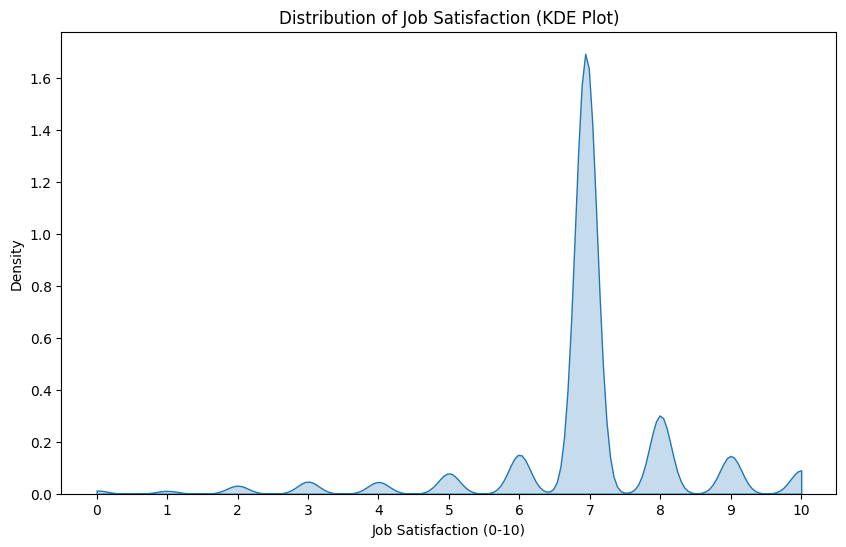

In [6]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, clip=(0,10))
plt.title('Distribution of Job Satisfaction (KDE Plot)')
plt.xlabel('Job Satisfaction (0-10)')
plt.ylabel('Density')
plt.xticks(range(0, 11))
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
                            5692
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C         

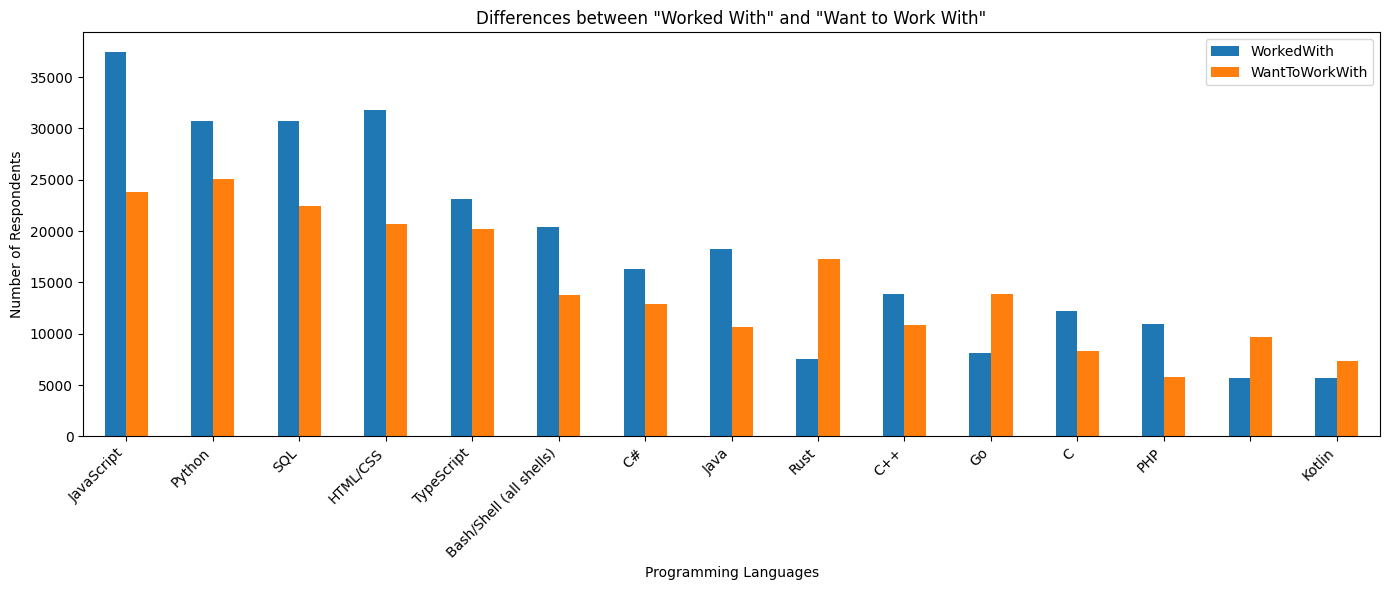

In [12]:
## Write your code here
worked_with = df["LanguageHaveWorkedWith"].dropna().str.split(';').explode()
want_to_work_with = df["LanguageWantToWorkWith"].dropna().str.split(';').explode()

worked_with_count = worked_with.value_counts()
want_to_work_with_count = want_to_work_with.value_counts()

print(worked_with_count)
print(want_to_work_with_count)

lang_df = pd.DataFrame.from_dict({
    'WorkedWith': dict(worked_with_count),
    'WantToWorkWith': dict(want_to_work_with_count)
}).fillna(0).astype(int)

lang_df['Total'] = lang_df['WorkedWith'] + lang_df['WantToWorkWith']
top_langs = lang_df.sort_values(by='Total', ascending=False).head(15)


top_langs[['WorkedWith', 'WantToWorkWith']].plot(
    kind='bar', figsize=(14, 6), color=['#1f77b4', '#ff7f0e']
)
plt.title('Differences between "Worked With" and "Want to Work With"')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


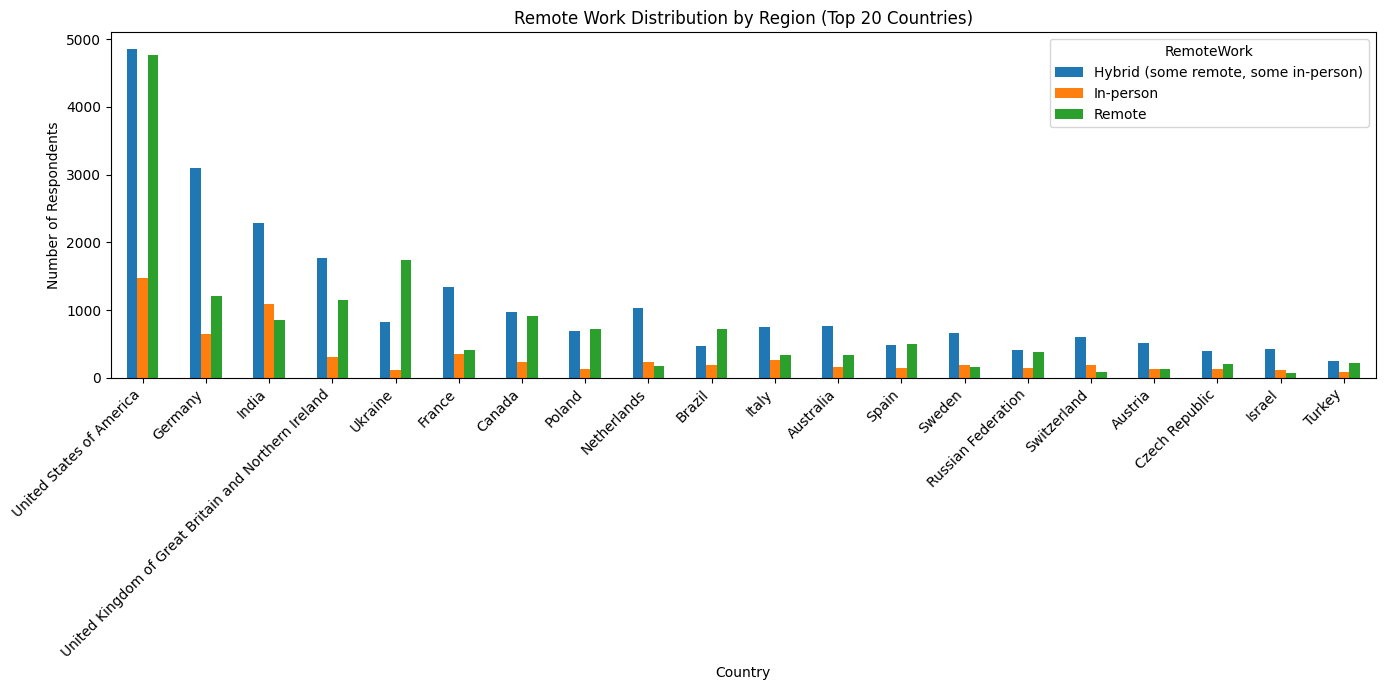

In [13]:
## Write your code here
remote_by_region = pd.crosstab(df['Country'], df['RemoteWork'])
top_countries = df['Country'].value_counts().head(20).index
remote_by_region = remote_by_region.loc[top_countries]

remote_by_region.plot(
    kind='bar', figsize=(14, 7),
    stacked=False,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
plt.title('Remote Work Distribution by Region (Top 20 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [15]:
## Write your code here
correlation_pearson = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
print(f"Pearson correlation coefficient: {correlation_pearson}")

Pearson correlation coefficient: 0.07052408099423457


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   

EdLevel                                             Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
Employment                                                                                         
Employed, full-time                                                                        16806   
Employed, full-time;Employed, part-time                       

/tmp/ipykernel_1890/3541237116.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


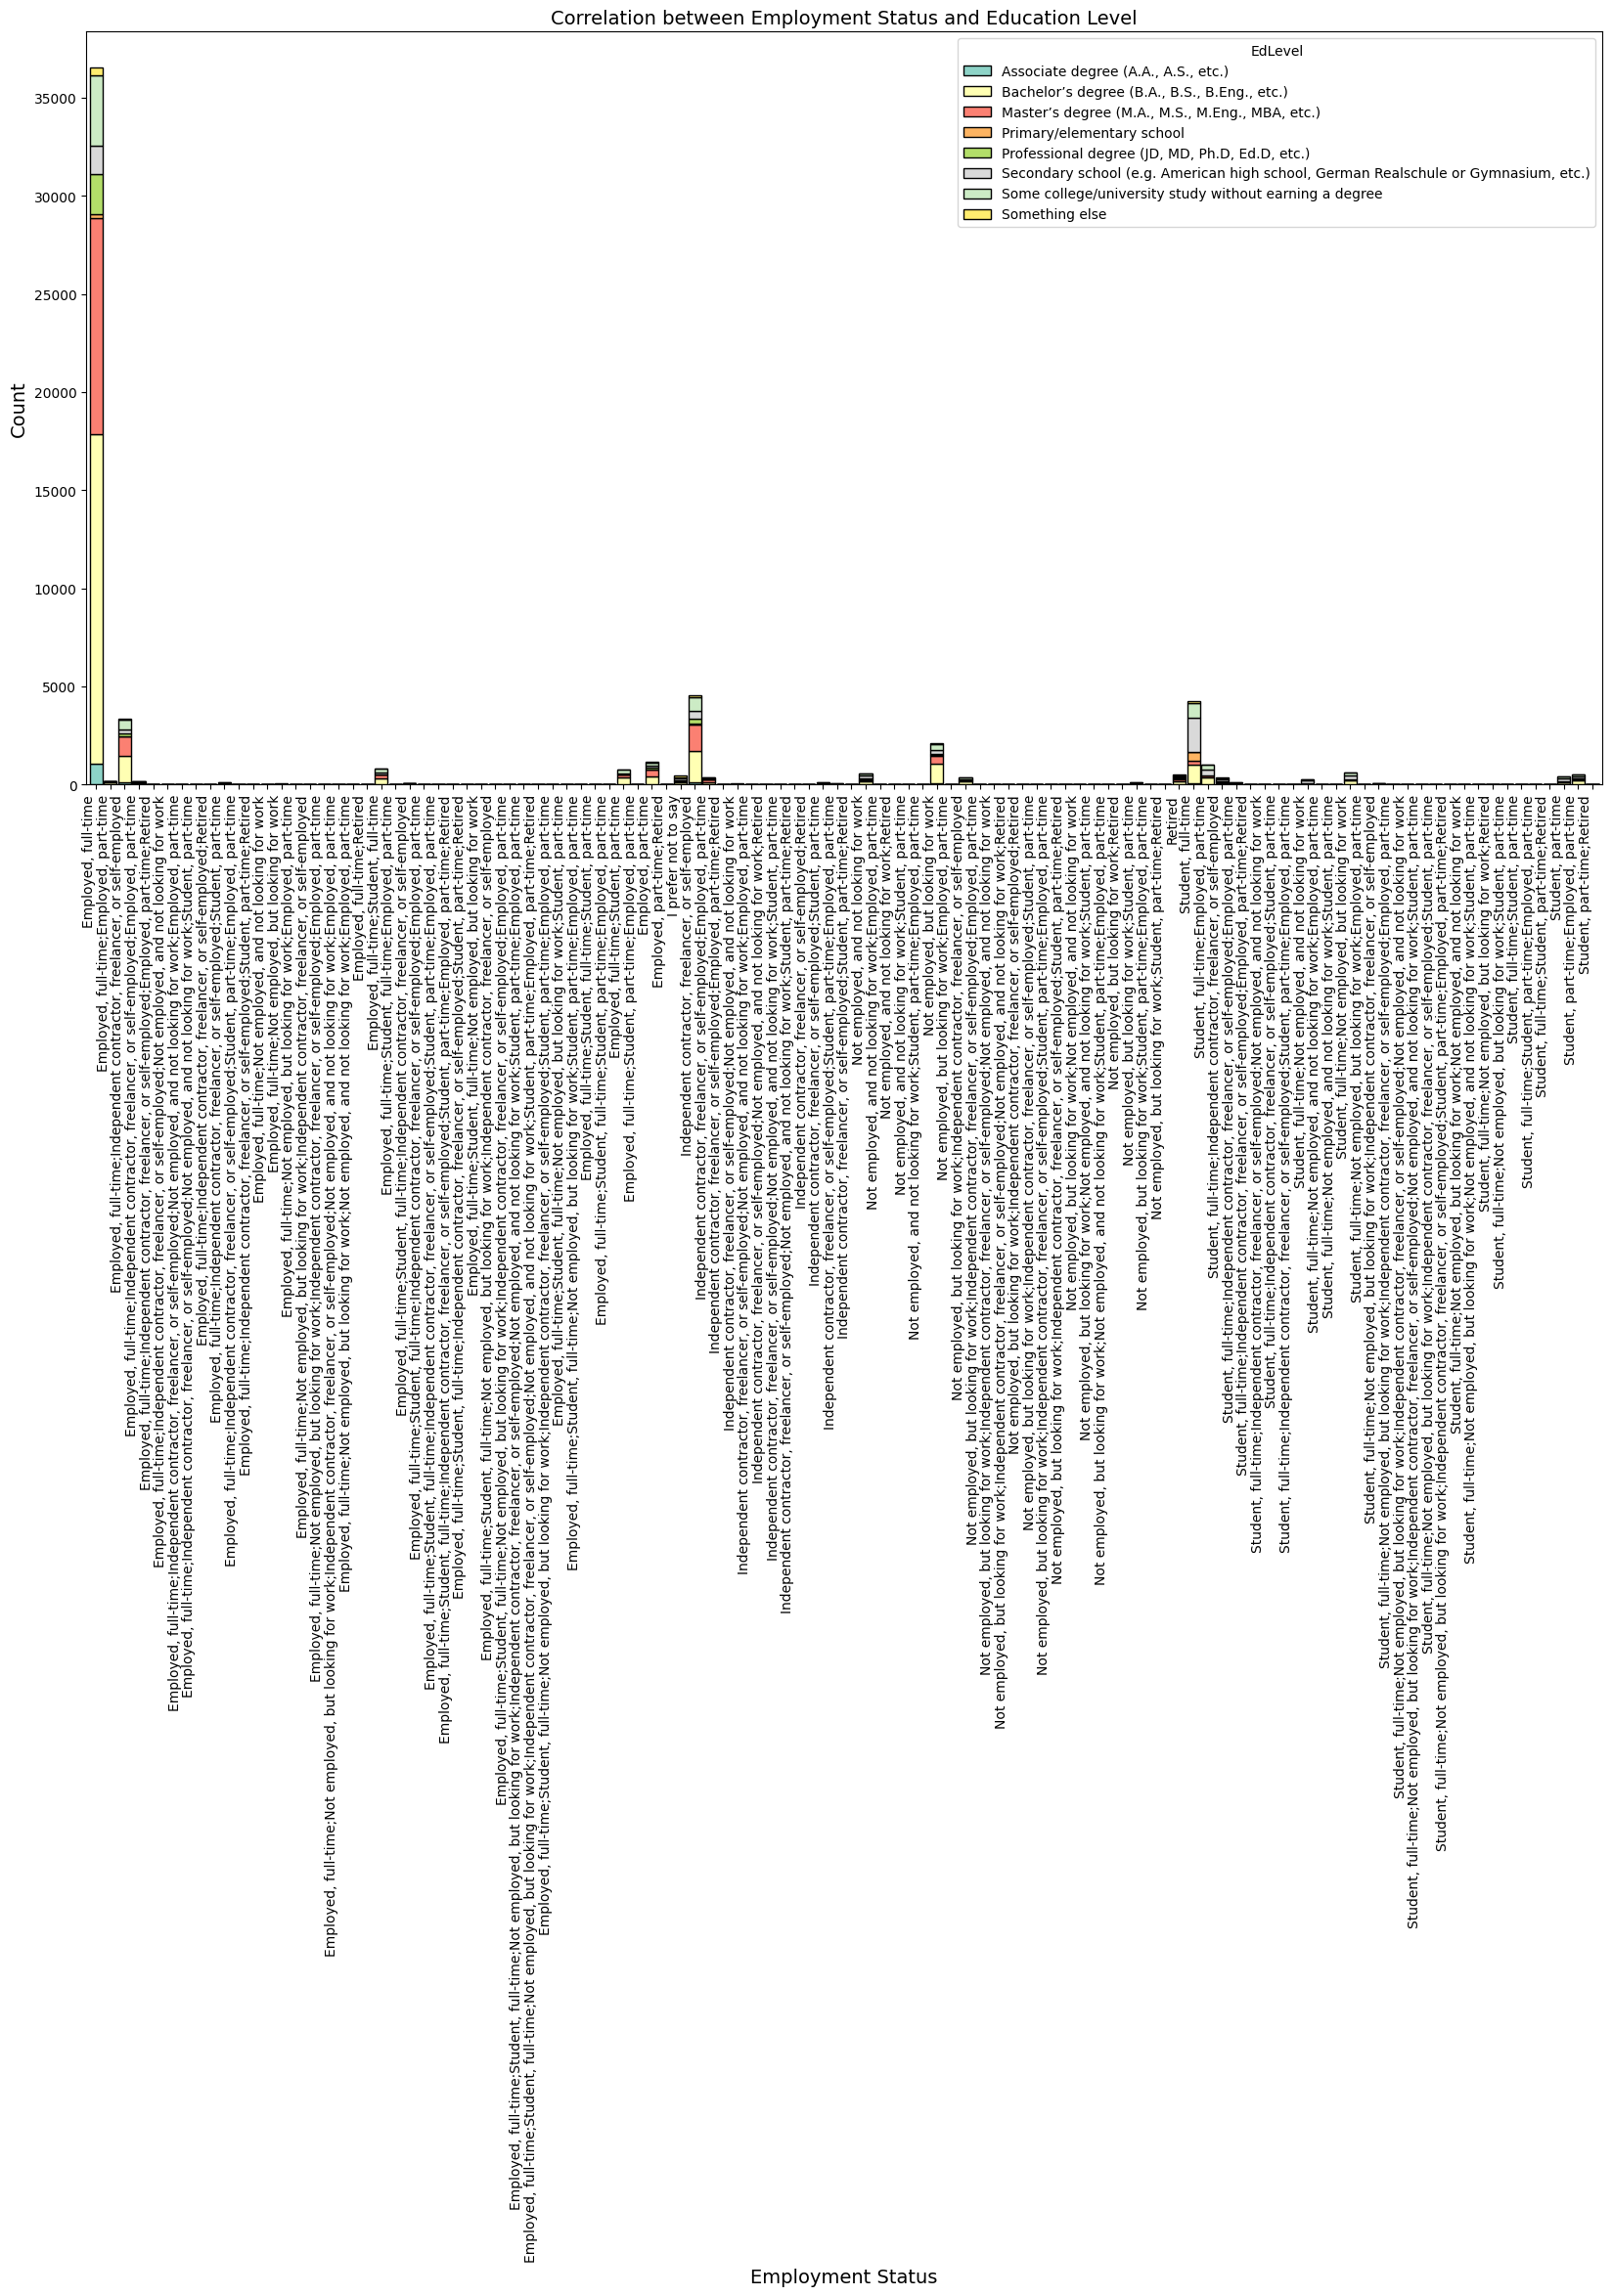

In [16]:
## Write your code here
cross_tabulation = pd.crosstab(df['Employment'], df['EdLevel'])
print(cross_tabulation.head())

top_20_index = cross_tabulation.sum(axis=1).sort_values(ascending=False).head(20).index
top_20_cross_tab = cross_tabulation.loc[top_20_index]

cross_tabulation.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    colormap='Set3',
    width=0.9,
    edgecolor='black'
)

plt.title('Correlation between Employment Status and Education Level', fontsize=14)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
